In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.columns:
    df[i] = le.fit_transform(df[i])
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [3]:
X = df.drop('gill-size', axis = 1)
y = df['gill-size']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: gill-size, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (22,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1472      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
191/191 [==============================] - 0s 1ms/step - loss: 0.1000 - mse: 0.1000 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 2/100
191/191 [==============================] - 0s 753us/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 3/100
191/191 [==============================] - 0s 731us/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 4/100
191/191 [==============================] - 0s 731us/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 5/100
191/191 [==============================] - 0s 743us/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 6/100
191/191 [==============================] - 0s 746us/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 7/100
191/191 [==============================] - 0s 744us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 8/100
191/191 [==============================] - 0s

In [7]:
model.evaluate(X_test, y_test)

64/64 [==============================] - 0s 601us/step - loss: 2.3688e-04 - mse: 2.3688e-04


[0.00023688460350967944, 0.00023688460350967944]

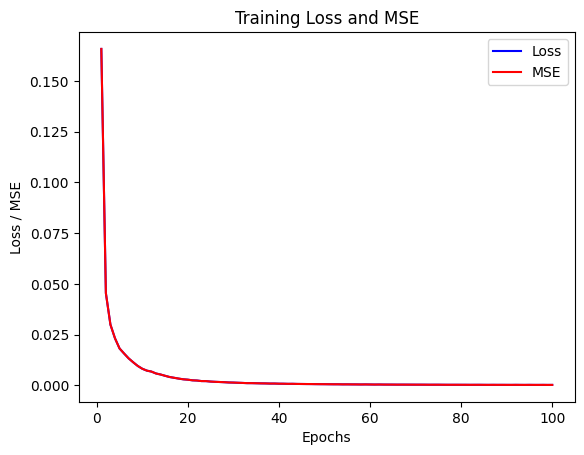

In [10]:
import matplotlib.pyplot as plt

# 손실(loss)과 평균 제곱 오차(MSE) 추출
loss = history.history['loss']
mse = history.history['mse']

# 그래프 그리기
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, mse, 'r', label='MSE')
plt.title('Training Loss and MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss / MSE')
plt.legend()
plt.show()